### Importing libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Data cleaning

In [3]:
all_data=pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [4]:
all_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [5]:
all_data.dropna(inplace=True)
all_data.reset_index(drop=True, inplace=True)

In [6]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [7]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186305 entries, 0 to 186304
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [9]:
all_data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [10]:
# Convert 'Quantity Ordered' to numeric, forcing errors to NaN
all_data['Quantity_Ordered'] = pd.to_numeric(all_data['Quantity Ordered'],errors='coerce')
all_data['Price'] = pd.to_numeric(all_data['Price Each'],errors='coerce')

In [11]:
all_data.loc[516:517,:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Quantity_Ordered,Price
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301",1.0,150.0
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,NaN,NaN


In [12]:
all_data.isna().sum()

Order ID              0
Product               0
Quantity Ordered      0
Price Each            0
Order Date            0
Purchase Address      0
Quantity_Ordered    355
Price               355
dtype: int64

In [13]:
all_data.dropna(inplace=True)
all_data.reset_index(drop=True, inplace=True)

In [14]:
all_data.drop(columns=['Price Each','Quantity Ordered'],inplace=True)

### Finding the month with Highest Sales 
 

In [15]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2.0,11.95
1,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,99.99
2,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00
3,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99
4,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1.0,11.99


In [16]:
all_data['Month']=all_data['Order Date'].str[0:2]

In [17]:
all_data.head(3)

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2.0,11.95,04
1,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,99.99,04
2,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,04


In [18]:
all_data['Total Amount']=all_data['Price']*all_data['Quantity_Ordered']

In [19]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2.0,11.95,04,23.90
1,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,99.99,04,99.99
2,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,04,600.00
3,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,04,11.99
4,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1.0,11.99,04,11.99


In [20]:
print(len(all_data.loc[all_data['Month']=='01']))

9709


In [21]:
all_data['Month']=all_data['Month'].astype('int32')

In [22]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2.0,11.95,4,23.90
1,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,99.99,4,99.99
2,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00
3,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99
4,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1.0,11.99,4,11.99


In [23]:
monthly_sales=all_data.groupby('Month')['Total Amount'].sum()
print(monthly_sales)

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Amount, dtype: float64


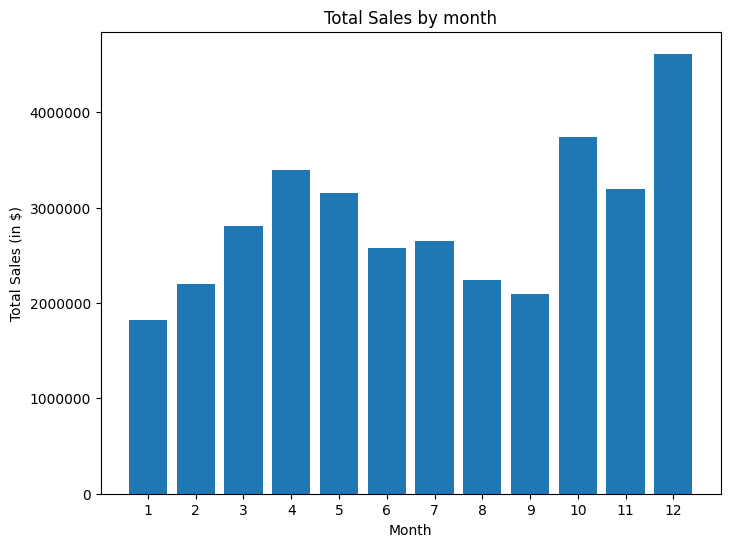

In [24]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(8, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales (in $)')
plt.title('Total Sales by month')
plt.xticks(monthly_sales.index) 

# Use ScalarFormatter to display plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


**Key Findings:**
- ***Most*** sales were in the month of **December**- $4,613,443.34
- **January** recorded the ***lowest*** sales $1822256.73


### Finding the Total Sales by City

In [25]:
import string
# extracting city, and state from purchase address
test="682 Chestnut St, Boston, MA 02215	"
conv=test.split(sep=",")
print(conv[1].strip()+", "+conv[2].strip()[:2])


Boston, MA


In [26]:
all_data['City_State']=all_data['Purchase Address'].apply(lambda x:x.split(",")[1].strip()+", "+ x.split(",")[2].strip()[:2])

In [27]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State
0,176558,USB-C Charging Cable,04/19/19 08:46,"917 1st St, Dallas, TX 75001",2.0,11.95,4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",1.0,99.99,4,99.99,"Boston, MA"
2,176560,Google Phone,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA"


In [28]:
all_data.groupby('City_State')['Total Amount'].sum()

City_State
Atlanta, GA          2795498.58
Austin, TX           1819581.75
Boston, MA           3661642.01
Dallas, TX           2767975.40
Los Angeles, CA      5452570.80
New York City, NY    4664317.43
Portland, ME          449758.27
Portland, OR         1870732.34
San Francisco, CA    8262203.91
Seattle, WA          2747755.48
Name: Total Amount, dtype: float64

In [29]:
city_total=all_data.groupby('City_State')['Total Amount'].sum()


In [30]:
city_total.values

array([2795498.58, 1819581.75, 3661642.01, 2767975.4 , 5452570.8 ,
       4664317.43,  449758.27, 1870732.34, 8262203.91, 2747755.48])

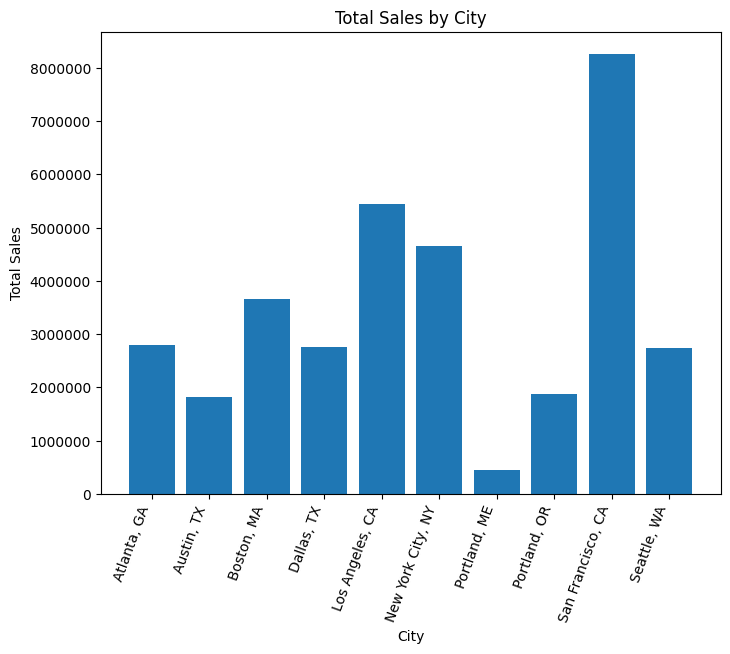

In [31]:
from matplotlib.ticker import ScalarFormatter

plt.figure(figsize=(8, 6))
plt.bar(city_total.index, city_total.values)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.title('Total Sales by City')
plt.xticks(city_total.index,rotation=70,ha='right') 

# Use ScalarFormatter to display plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


Key Findings:
- Cities in **California** *(L.A and San Francisco)* accounted for the highest sales 

### Finding the Hour of day with the most orders

In [32]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2.0,11.95,4,23.90,"Dallas, TX"
1,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1.0,99.99,4,99.99,"Boston, MA"
2,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA"
3,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA"
4,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA"


In [33]:
all_data['Hour']=all_data['Order Date'].dt.hour

In [34]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State,Hour
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2.0,11.95,4,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1.0,99.99,4,99.99,"Boston, MA",22
2,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA",9


In [35]:
hourly_total=all_data.groupby('Hour')['Total Amount'].sum()

In [36]:
num_orders=all_data.groupby('Hour')['Order ID'].count()

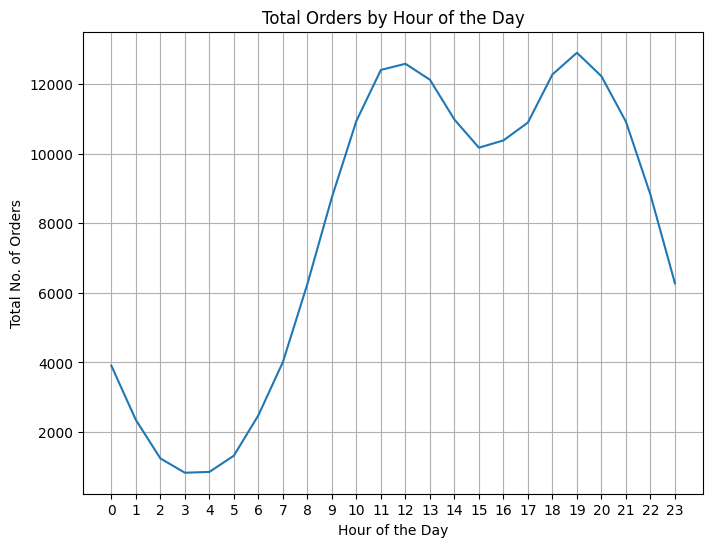

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(num_orders.index, num_orders.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Total No. of Orders')
plt.title('Total Orders by Hour of the Day')
plt.xticks(num_orders.index)  
plt.grid(True)

# Use ScalarFormatter to display plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


**Key Findings**:
- Most Orders came around **12 noon** and **7 p.m**.

### Most Products which were bought together

In [38]:
order_count=all_data['Order ID'].value_counts()

In [39]:
df=all_data[all_data['Order ID'].duplicated(keep=False)]

In [40]:
df.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State,Hour
2,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA",14
17,176574,Google Phone,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA",19
18,176574,USB-C Charging Cable,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",1.0,11.95,4,11.95,"Los Angeles, CA",19
29,176585,Bose SoundSport Headphones,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",1.0,99.99,4,99.99,"Boston, MA",11


In [ ]:
df['Grouped_prods']=df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
df=df[['Order ID','Grouped_prods']]


In [ ]:
df.drop_duplicates(inplace=True)

In [43]:
df.head()

,Order ID,Grouped_prods
2,176560,"Google Phone, Wired Headphones"
17,176574,"Google Phone, USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones, Bose SoundSport He..."
31,176586,"AAA Batteries (4-pack), Google Phone"
118,176672,"Lightning Charging Cable, USB-C Charging Cable"


In [44]:
from collections import Counter
from itertools import combinations
ctr=Counter()
for row in df['Grouped_prods']:
    row_list=row.split(",")
    ctr.update(Counter(combinations(row_list,2)))

print(ctr)

Counter({('iPhone', ' Lightning Charging Cable'): 1005, ('Google Phone', ' USB-C Charging Cable'): 987, ('iPhone', ' Wired Headphones'): 447, ('Google Phone', ' Wired Headphones'): 414, ('Vareebadd Phone', ' USB-C Charging Cable'): 361, ('iPhone', ' Apple Airpods Headphones'): 360, ('Google Phone', ' Bose SoundSport Headphones'): 220, ('Vareebadd Phone', ' Wired Headphones'): 143, (' USB-C Charging Cable', ' Wired Headphones'): 120, ('Vareebadd Phone', ' Bose SoundSport Headphones'): 80, (' Lightning Charging Cable', ' Wired Headphones'): 62, ('Lightning Charging Cable', ' USB-C Charging Cable'): 55, ('Lightning Charging Cable', ' AA Batteries (4-pack)'): 52, (' USB-C Charging Cable', ' Bose SoundSport Headphones'): 51, ('Lightning Charging Cable', ' Lightning Charging Cable'): 51, ('AA Batteries (4-pack)', ' Lightning Charging Cable'): 51, ('AAA Batteries (4-pack)', ' USB-C Charging Cable'): 50, ('AA Batteries (4-pack)', ' AAA Batteries (4-pack)'): 48, ('AAA Batteries (4-pack)', ' AAA

In [45]:
print("Top 10 Most Bought Combinations:")
print(f"{'Products':<55} {'No. of Purchases':<15}")
print("="*75)
i=1
for combi, total in ctr.most_common(10):
    products = ', '.join(combi)
    print(f"{i}. {products:<60} {total:<15}")
    i+=1


Top 10 Most Bought Combinations:
Products                                                No. of Purchases
1. iPhone,  Lightning Charging Cable                            1005           
2. Google Phone,  USB-C Charging Cable                          987            
3. iPhone,  Wired Headphones                                    447            
4. Google Phone,  Wired Headphones                              414            
5. Vareebadd Phone,  USB-C Charging Cable                       361            
6. iPhone,  Apple Airpods Headphones                            360            
7. Google Phone,  Bose SoundSport Headphones                    220            
8. Vareebadd Phone,  Wired Headphones                           143            
9.  USB-C Charging Cable,  Wired Headphones                     120            
10. Vareebadd Phone,  Bose SoundSport Headphones                 80             


### Total revenue generated by each product

In [46]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity_Ordered'].sum()

prod = [pair for pair, df in product_group]
print(prod)

['20in Monitor', '27in 4K Gaming Monitor', '27in FHD Monitor', '34in Ultrawide Monitor', 'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Apple Airpods Headphones', 'Bose SoundSport Headphones', 'Flatscreen TV', 'Google Phone', 'LG Dryer', 'LG Washing Machine', 'Lightning Charging Cable', 'Macbook Pro Laptop', 'ThinkPad Laptop', 'USB-C Charging Cable', 'Vareebadd Phone', 'Wired Headphones', 'iPhone']


In [ ]:
prices=all_data.groupby('Product')['Price'].mean()

fig,ax1=plt.subplots()
ax2=ax1.twinx()
ax1.bar(prod, quantity_ordered, color='g')
ax2.plot(prod, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(prod, rotation='vertical', size=8)

plt.show()

**Key Findings**: 
- Most products bring in justified sales based on their price except for **LG Dryer**, and **LG Washing Machine** 
which are ***severely underselling*** for the price they cost

In [48]:
all_data.head()

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State,Hour
0,176558,USB-C Charging Cable,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",2.0,11.95,4,23.90,"Dallas, TX",8
1,176559,Bose SoundSport Headphones,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",1.0,99.99,4,99.99,"Boston, MA",22
2,176560,Google Phone,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,600.00,4,600.00,"Los Angeles, CA",14
3,176560,Wired Headphones,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA",14
4,176561,Wired Headphones,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",1.0,11.99,4,11.99,"Los Angeles, CA",9


### City comparision(Los Angeles vs New york city)
- Most ordered products
- Peak order time


In [49]:
ny=all_data[all_data['City_State']=='New York City, NY']
la= all_data[all_data['City_State']=='Los Angeles, CA']

In [50]:
print(len(la))
print(len(ny))

29605
24876


In [51]:
ny_pd=ny.groupby('Product')['Quantity_Ordered'].count().to_dict()
print(ny_pd)

{'20in Monitor': 555, '27in 4K Gaming Monitor': 840, '27in FHD Monitor': 1069, '34in Ultrawide Monitor': 865, 'AA Batteries (4-pack)': 2675, 'AAA Batteries (4-pack)': 2773, 'Apple Airpods Headphones': 2079, 'Bose SoundSport Headphones': 1771, 'Flatscreen TV': 625, 'Google Phone': 758, 'LG Dryer': 77, 'LG Washing Machine': 85, 'Lightning Charging Cable': 2861, 'Macbook Pro Laptop': 656, 'ThinkPad Laptop': 559, 'USB-C Charging Cable': 2978, 'Vareebadd Phone': 279, 'Wired Headphones': 2490, 'iPhone': 881}


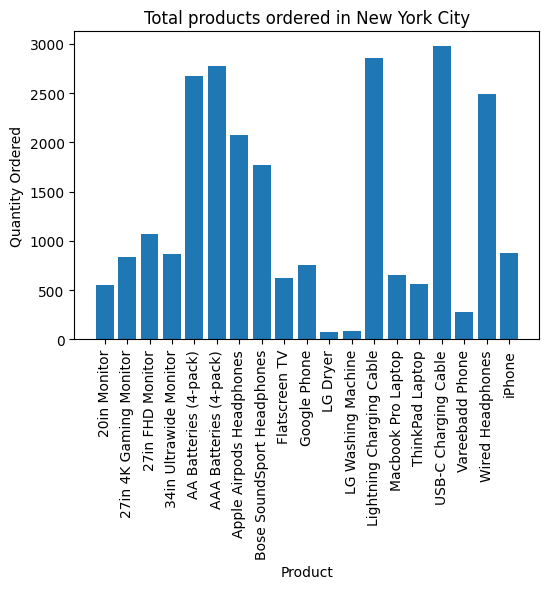

In [52]:
plt.figure(figsize=(6, 4))
plt.bar(list(ny_pd.keys()), list(ny_pd.values()))
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total products ordered in New York City')
plt.xticks(list(ny_pd.keys()),rotation='vertical') 

# Use ScalarFormatter to display plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


Most ordered products in **NYC** were:
1. USB-C Charging Cable:     2978
2. Lightning Charging Cable: 2861 
3. AAA Batteries (4-pack):   2773
4. AA Batteries (4-pack):    2675
5. Wired Headphones:         2490


In [53]:
la_pd=la.groupby('Product')['Quantity_Ordered'].count().to_dict()
print(la_pd)

{'20in Monitor': 654, '27in 4K Gaming Monitor': 1003, '27in FHD Monitor': 1217, '34in Ultrawide Monitor': 953, 'AA Batteries (4-pack)': 3289, 'AAA Batteries (4-pack)': 3313, 'Apple Airpods Headphones': 2452, 'Bose SoundSport Headphones': 2099, 'Flatscreen TV': 724, 'Google Phone': 845, 'LG Dryer': 116, 'LG Washing Machine': 105, 'Lightning Charging Cable': 3512, 'Macbook Pro Laptop': 751, 'ThinkPad Laptop': 641, 'USB-C Charging Cable': 3454, 'Vareebadd Phone': 317, 'Wired Headphones': 3043, 'iPhone': 1117}


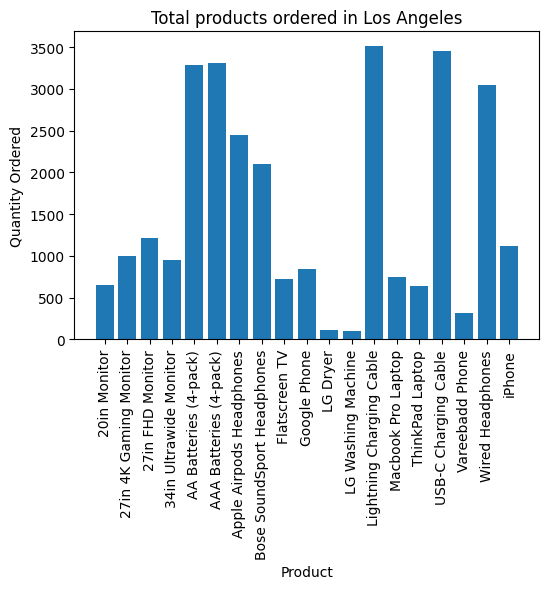

In [54]:
plt.figure(figsize=(6, 4))
plt.bar(list(la_pd.keys()), list(la_pd.values()))
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.title('Total products ordered in Los Angeles')
plt.xticks(list(la_pd.keys()),rotation='vertical') 

# Use ScalarFormatter to display plain numbers instead of scientific notation
plt.gca().yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
plt.gca().yaxis.get_major_formatter().set_scientific(False)


Most ordered products in **L.A** were:
1. Lightning Charging Cable:     3512
2. USB-C Charging Cable:        3454 
3. AAA Batteries (4-pack):   3313
4. AA Batteries (4-pack):    3289
5. Wired Headphones:         3043

In [55]:
ny_no=ny.groupby('Hour')['Order ID'].count().to_dict()
la_no=la.groupby('Hour')['Order ID'].count().to_dict()

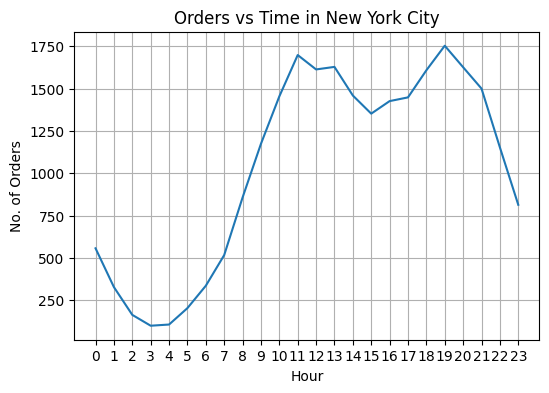

In [56]:
plt.figure(figsize=(6, 4))
plt.plot(list(ny_no.keys()), list(ny_no.values()))
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.title('Orders vs Time in New York City')
plt.grid(True)
plt.xticks(list(ny_no.keys())) 
plt.show()


- Most orders in NYC came around 7 p.m 

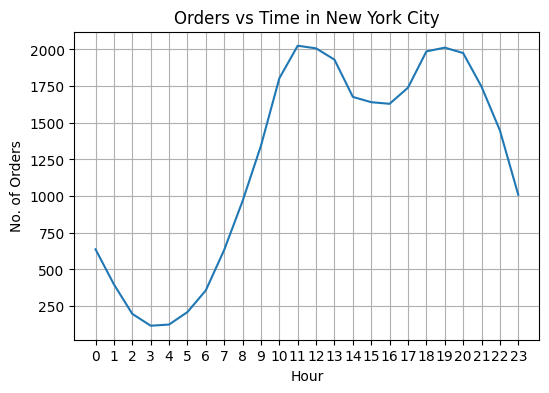

In [57]:
plt.figure(figsize=(6, 4))
plt.plot(list(la_no.keys()), list(la_no.values()))
plt.xlabel('Hour')
plt.ylabel('No. of Orders')
plt.title('Orders vs Time in New York City')
plt.grid(True)
plt.xticks(list(la_no.keys())) 
plt.show()


- Most orders in LA came around 11 a.m closely followed by 7pm

Key Findings:
- NYC and LA exhibited almost the same sales patterns.
- Similar sales strategies could be used for these two cities 

### Analyzing Sales by Time period(Quarterly).


In [58]:
#assigning months to quarters
all_data['Quarter'] = pd.cut(all_data['Month'],
                       bins=[0, 3, 6, 9, 12],  # Define the edges of the bins
                       labels=['Q1', 'Q2', 'Q3', 'Q4'],  # Labels for the bins
                       include_lowest=True)  # Include the first bin's left edge


In [59]:
all_data.sample(3)

,Order ID,Product,Order Date,Purchase Address,Quantity_Ordered,Price,Month,Total Amount,City_State,Hour,Quarter
114685,171548,Bose SoundSport Headphones,2019-03-07 20:35:00,"347 9th St, Dallas, TX 75001",1.0,99.99,3,99.99,"Dallas, TX",20,Q1
100360,218708,USB-C Charging Cable,2019-06-11 17:10:00,"156 11th St, Seattle, WA 98101",1.0,11.95,6,11.95,"Seattle, WA",17,Q2
22897,241112,AA Batteries (4-pack),2019-08-03 12:29:00,"940 Forest St, San Francisco, CA 94016",1.0,3.84,8,3.84,"San Francisco, CA",12,Q3


In [60]:
quarterly_sales=all_data.groupby(['Product','Quarter'])['Total Amount'].sum().unstack().fillna(0)

In [61]:
print(quarterly_sales)

Quarter                             Q1          Q2          Q3          Q4
Product                                                                   
20in Monitor                  86892.10   116149.44    95141.35   155965.82
27in 4K Gaming Monitor       475397.81   607994.41   508546.96   843158.38
27in FHD Monitor             225734.95   298780.08   237134.19   370775.28
34in Ultrawide Monitor       476507.46   628123.47   463967.79   786959.29
AA Batteries (4-pack)         20640.00    28035.84    21772.80    35669.76
AAA Batteries (4-pack)        18092.49    24003.72    18863.91    31780.71
Apple Airpods Headphones     472800.00   607650.00   479700.00   789000.00
Bose SoundSport Headphones   270072.99   344565.54   276872.31   454054.59
Flatscreen TV                275700.00   367800.00   307200.00   495000.00
Google Phone                 697800.00   870600.00   667800.00  1083000.00
LG Dryer                      75600.00   118200.00    78600.00   115200.00
LG Washing Machine       

In [62]:
import plotly.graph_objs as go

quarterly_sales = all_data.groupby(['Product', 'Quarter'])['Total Amount'].sum().unstack().fillna(0)

fig = go.Figure()

# Flags to ensure the green and red dots are only added to the legend once
max_marker_added = False
min_marker_added = False

for product in quarterly_sales.index:
    
    # Get sales data for the current product
    sales_data = quarterly_sales.loc[product]
    
    # Find the quarter with the highest and lowest sales
    max_quarter = sales_data.idxmax()
    min_quarter = sales_data.idxmin()
    
    # Plot the sales line
    fig.add_trace(go.Scatter(
        x=sales_data.index.astype(str),
        y=sales_data.values,
        mode='lines+markers',
        name=product
    ))
    
    # Add a marker for the highest sales
    fig.add_trace(go.Scatter(
        x=[max_quarter],
        y=[sales_data[max_quarter]],
        mode='markers',
        marker=dict(color='green', size=10),
        name='Max Sales' if not max_marker_added else None,
        legendgroup='max_sales',
        showlegend=not max_marker_added  # Only show the legend once
    ))
    max_marker_added = True  # Set the flag so we don't add it again

    # Add a marker for the lowest sales
    fig.add_trace(go.Scatter(
        x=[min_quarter],
        y=[sales_data[min_quarter]],
        mode='markers',
        marker=dict(color='red', size=10),
        name='Min Sales' if not min_marker_added else None,
        legendgroup='min_sales',
        showlegend=not min_marker_added  # Only show the legend once
    ))
    min_marker_added = True  # Set the flag so we don't add it again

# Update layout with black background and increased size
fig.update_layout(
    title="Product Sales by Quarter",
    xaxis_title="Quarter",
    yaxis_title="Total Sales ($)",
    hovermode="x unified",
    legend_title="Legend",
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    width=1200,  
    height=600   
)

fig.show()



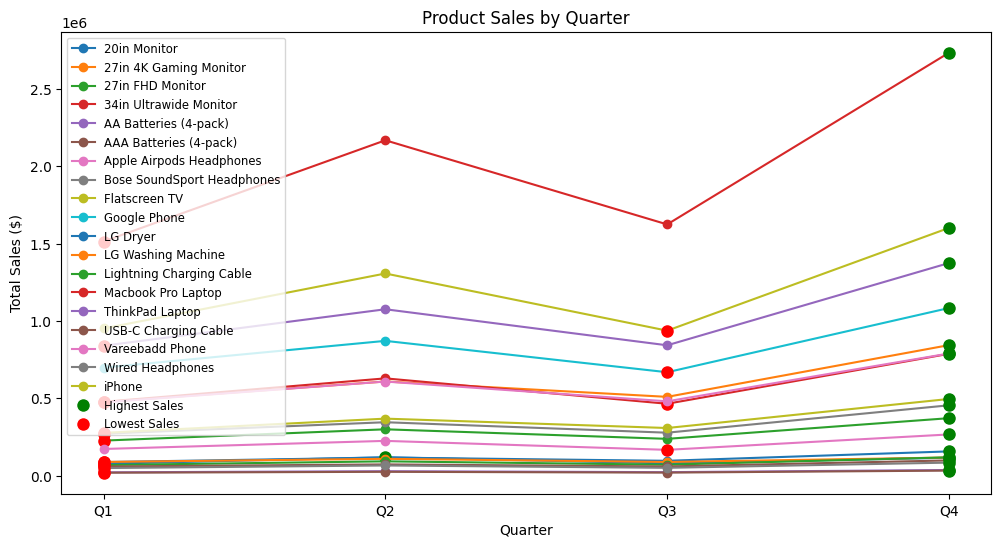

In [64]:
import matplotlib.pyplot as plt

# Assuming `quarterly_sales` is already defined as in your Plotly code

# Initialize the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define colors for the max and min markers
max_marker_color = 'green'
min_marker_color = 'red'

# Plot the sales data for each product
for product in quarterly_sales.index:
    
    # Get sales data for the current product
    sales_data = quarterly_sales.loc[product]
    
    # Find the quarter with the highest and lowest sales
    max_quarter = sales_data.idxmax()
    min_quarter = sales_data.idxmin()
    
    # Plot the sales line
    ax.plot(sales_data.index.astype(str), sales_data.values, marker='o', label=product)
    
    # Add a marker for the highest sales
    ax.plot(
        max_quarter,
        sales_data[max_quarter],
        marker='o',
        markersize=8,
        color=max_marker_color
    )
    
    # Add a marker for the lowest sales
    ax.plot(
        min_quarter,
        sales_data[min_quarter],
        marker='o',
        markersize=8,
        color=min_marker_color
    )

# Set labels and title
ax.set_xlabel('Quarter')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Product Sales by Quarter')

# Add a legend for max and min markers
max_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=max_marker_color, markersize=10, label='Highest Sales')
min_patch = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=min_marker_color, markersize=10, label='Lowest Sales')

# Add both product and marker legends
handles, labels = ax.get_legend_handles_labels()
handles.extend([max_patch, min_patch])
ax.legend(handles=handles, loc='upper left', fontsize='small')

# Display the plot
plt.show()


**Key Findings**:

- We can see that all products except one had their **best selling** sales in **Q4** while the **lowest selling Quarters** were shared between **Q1 and Q3.**
